In [1]:
import os
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv("gender_age_train.csv")
test  = pd.read_csv("gender_age_test.csv")
print(train.shape,test.shape)
train.head()

(74645, 4) (112071, 1)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


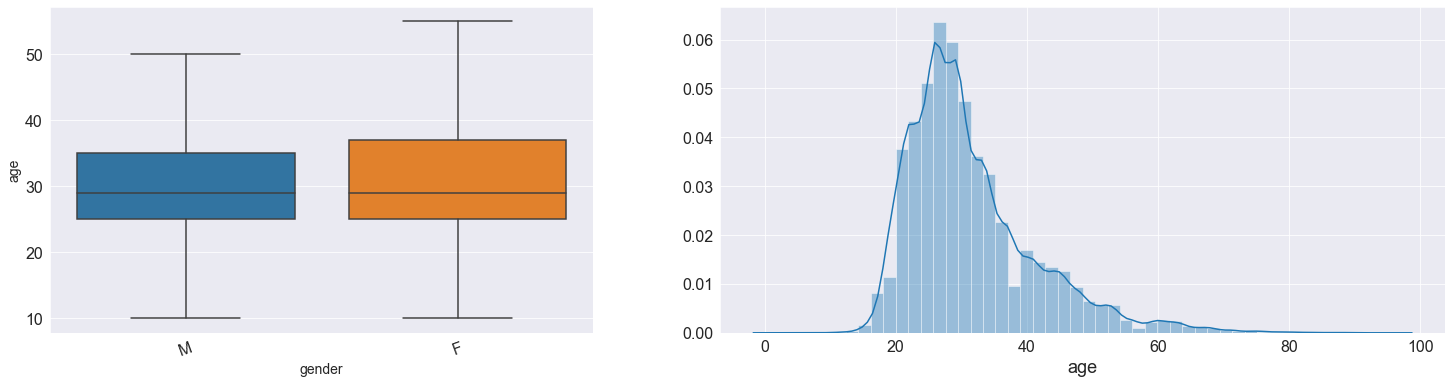

In [2]:
sns.set_style("darkgrid")
train["gender"]=train["group"].apply(lambda x:x[0])
gender = train["gender"].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[3,4]},figsize=(25, 6))
sns.boxplot(x ="gender",y="age" ,data=train,ax=axs[0],showfliers=False)
axs[0].tick_params(axis='x', rotation=20)
axs[0].xaxis.label.set_size(14)
axs[0].yaxis.label.set_size(14)
axs[0].yaxis.set_tick_params(labelsize=16)
axs[0].xaxis.set_tick_params(labelsize=16)

sns.distplot(train["age"],kde=True,ax=axs[1])
axs[1].xaxis.label.set_size(18)
axs[1].yaxis.set_tick_params(labelsize=16)
axs[1].xaxis.set_tick_params(labelsize=16)

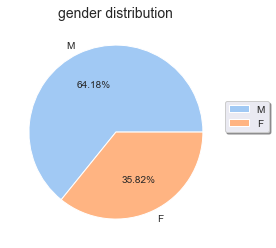

In [3]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(gender, labels =["M","F"] , colors = colors, autopct='%.2f%%');
plt.legend(labels=gender.index, loc=(1,0.5), shadow=True)
plt.title("gender distribution",fontsize=14);

In [4]:
brand =pd.read_csv("phone_brand_device_model.csv")
brand = brand.drop_duplicates()
print(brand.shape)
brand.head()

(186722, 3)


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


0.9558


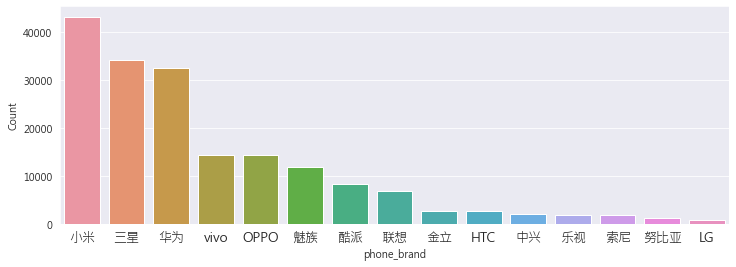

In [5]:
plt.figure(figsize=[12,4])
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})
brand_all = brand.groupby("phone_brand").agg({"device_id":"count"}).reset_index().sort_values("device_id",ascending=False)
brand_plot = brand_all[:15] 
print("%.4f"   %(brand_plot["device_id"].sum()/brand_all["device_id"].sum()))

ax=sns.barplot(x =brand_plot["phone_brand"] ,y=brand_plot["device_id"])
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=13)
plt.ylabel("Count");

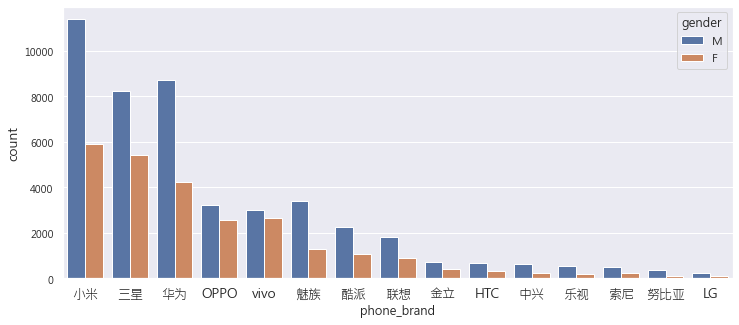

In [6]:
device_gender = train.merge(brand,on="device_id",how="left")
device_gender =device_gender[device_gender["phone_brand"].isin(brand_plot["phone_brand"])]
plt.figure(figsize=[12,5])
sns.set(font=['sans-serif'])
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})
ax=sns.countplot(x="phone_brand" ,hue="gender",order =device_gender["phone_brand"].value_counts().index,data=device_gender)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(13)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=13)

In [7]:
d_count = brand.groupby("device_id")["device_id"].count().reset_index(name="count").sort_values("count",ascending=False)
d_count_non_unique = d_count[d_count["count"]==2]
non_unique = brand[brand["device_id"].isin(d_count_non_unique["device_id"].values)].sort_values("device_id")
print("There are %d device_id which are duplicated." %(d_count_non_unique.shape[0]))
non_unique.head(6)

There are 6 device_id which are duplicated.


,device_id,phone_brand,device_model
45947,-7297178577997113203,华为,荣耀畅玩5X
112903,-7297178577997113203,华为,荣耀3C
81222,-7059081542575379359,LG,Nexus 5
93035,-7059081542575379359,魅族,魅蓝Note 2
69302,-6590454305031525112,小米,MI 3
140520,-6590454305031525112,华为,荣耀6 Plus


In [8]:
brand = brand.drop_duplicates(subset=["device_id"], keep='last')

In [9]:
print("%.4f" %(brand["device_model"].value_counts()[:180].sum()/brand["device_model"].value_counts().sum()))
print(brand["device_model"].value_counts()[:180].index)

0.7876
Index(['红米note', 'MI 3', 'MI 2S', 'Galaxy Note 3', 'MI 4', 'Galaxy S4',
       'Galaxy Note 2', '荣耀6', '荣耀畅玩4X', '荣耀3C',
       ...
       'Galaxy Premier', 'X1 7.0', 'Galaxy Core Max', 'Y51', 'R823T',
       'Galaxy Mega 2', 'Galaxy Trend DUOS 2', 'S898t', 'A708t', 'Y29L'],
      dtype='object', length=180)


In [10]:
train = train.merge(brand[["device_id","phone_brand","device_model"]],on="device_id",how="left")
test = test.merge(brand[["device_id","phone_brand","device_model"]],on="device_id",how="left")
bp = brand_plot["phone_brand"].values
train["phone_brand"] = train["phone_brand"].apply(lambda x: x if x in bp else "other")
test["phone_brand"] = test["phone_brand"].apply(lambda x: x if x in bp else "other")
dev= brand["device_model"].value_counts()[:180].index
train["device"] = train["device_model"].apply(lambda x: x if x in dev else "other")
test["device"] = test["device_model"].apply(lambda x: x if x in dev else "other")

In [11]:
app_events = pd.read_csv("app_events.csv")
app_events.drop("is_installed",axis=1,inplace=True)
print(app_events.shape)
app_events.head()

(32473067, 3)


,event_id,app_id,is_active
0,2,5927333115845830913,1
1,2,-5720078949152207372,0
2,2,-1633887856876571208,0
3,2,-653184325010919369,1
4,2,8693964245073640147,1


In [12]:
print(len(np.unique(app_events["event_id"])))
print(len(np.unique(app_events["app_id"])))

1488096
19237


In [13]:
events = pd.read_csv("events.csv")
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


<AxesSubplot:xlabel='hour', ylabel='count'>

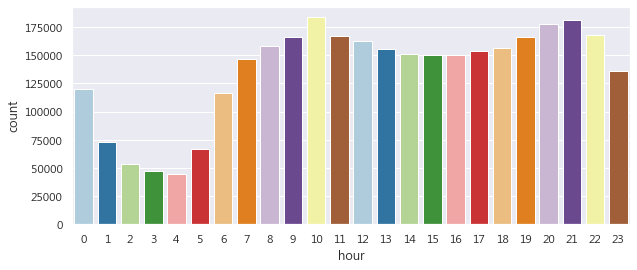

In [14]:
events["timestamp"]= events["timestamp"].apply(lambda x:pd.to_datetime(x, format='%Y/%m/%d %H:%M:%S'))
events["hour"] = events["timestamp"].apply(lambda x:x.hour)
events["weekday"] = events["timestamp"].apply(lambda x:x.weekday())
hour_order = list(range(24))
plt.figure(figsize=[10,4])
sns.countplot(x=events["hour"],palette = "Paired", order = hour_order)

In [15]:
events["date"]= events["timestamp"].apply(lambda x:x.date())

In [16]:
events_geo = events[events["latitude"]+events["longitude"]!=0][["latitude","longitude"]].drop_duplicates()
events_geo.head()

,latitude,longitude
0,31.24,121.38
1,30.97,103.65
2,29.70,106.60
3,23.28,104.27
4,28.66,115.88


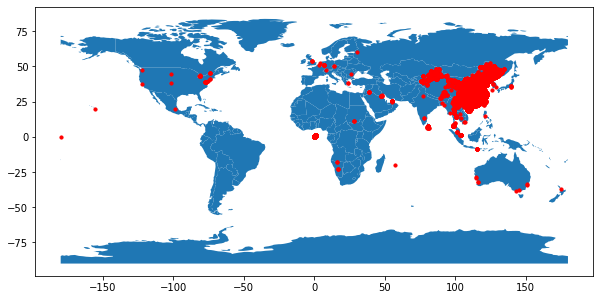

In [5]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(events_geo['longitude'], events_geo['latitude'])]
gdf = GeoDataFrame(events_geo, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=10);

In [17]:
app_events=app_events.merge(events[["device_id","event_id","hour","date","weekday","latitude","longitude"]],how="left",on="event_id")
app_events.head()

,event_id,app_id,is_active,device_id,hour,date,weekday,latitude,longitude
0,2,5927333115845830913,1,-6401643145415154744,0,2016-05-01,6,30.97,103.65
1,2,-5720078949152207372,0,-6401643145415154744,0,2016-05-01,6,30.97,103.65
2,2,-1633887856876571208,0,-6401643145415154744,0,2016-05-01,6,30.97,103.65
3,2,-653184325010919369,1,-6401643145415154744,0,2016-05-01,6,30.97,103.65
4,2,8693964245073640147,1,-6401643145415154744,0,2016-05-01,6,30.97,103.65


In [18]:
app_events.set_index("device_id",inplace=True)
app_events.sort_index(inplace=True)

In [40]:
train_with_event = train[train["device_id"].isin(app_events.index)]
train_no_event  = train[~train["device_id"].isin(app_events.index)]

test_with_event = test[test["device_id"].isin(app_events.index)]
test_no_event  = test[~test["device_id"].isin(app_events.index)]

print(train_with_event.shape,train_no_event.shape,test_with_event.shape,test_no_event.shape)

(23290, 7) (51355, 7) (35172, 4) (76899, 4)


In [20]:
train_no_event = pd.concat([train_no_event.drop(["phone_brand","device_model","device"],axis=1),\
                             pd.get_dummies(train_no_event["phone_brand"]),pd.get_dummies(train_no_event["device"])],axis=1)
test_no_event  =  pd.concat([test_no_event.drop(["phone_brand","device_model","device"],axis=1),\
                             pd.get_dummies(test_no_event["phone_brand"]),pd.get_dummies(test_no_event["device"])],axis=1)

In [21]:
from flaml import AutoML
automl_no_event = AutoML()
settings = {
    "metric": 'log_loss',
    "task": 'classification',
    "time_budget":80
}

In [22]:
automl_no_event.fit(X_train=train_no_event.drop(["group","device_id","gender","age"],axis=1).values, \
                    y_train= train_no_event["group"].values, **settings,verbose=0,eval_method ="cv")

In [23]:
pred = automl_no_event.predict_proba(test_no_event.drop("device_id",axis=1).values)
no_event_pred=pd.DataFrame(pred)
no_event_pred.columns=automl_no_event.classes_
no_event_pred["device_id"]= test_no_event["device_id"].values
no_event_pred=no_event_pred[["device_id"]+automl_no_event.classes_]

In [26]:
############################# with event

In [25]:
app_label = pd.read_csv("app_labels.csv")
app_label_type= pd.read_csv("label_categories.csv")
app_type= app_label.merge(app_label_type,how="left",on="label_id")
app_type.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.unique(app_type["category"]))
le_app_type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#le.fit(np.unique(app_events["app_id"]))
#le_app_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le.fit(train_with_event['device_id'])
le_train_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le.fit(test_with_event['device_id'])
le_test_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [28]:
from scipy.sparse import csr_matrix
def recommend(data_type):
    row_category=[]
    col_category=[]
    value_category=[]
    category_count =[]

    if data_type=="train":
        list_of_device = train_with_event['device_id']
        dict_device = le_train_mapping
    else:
        list_of_device = test_with_event['device_id']
        dict_device = le_test_mapping
    for device in list_of_device:
        device_data = app_events.loc[[device]]
        temp_app = app_type[app_type["app_id"].isin(device_data["app_id"].values)]
        device_data = device_data.merge(temp_app,how="left",on="app_id")
        device_data.drop_duplicates(subset="app_id",inplace=True)
        ###################################################################### installed app info
        #app_info = device_data[["app_id"]]
        #app_info["map_device"] = dict_device[device]
        #app_info["map_app"] = app_info["app_id"].map(le_app_mapping)
        #row_app.extend(list(app_info["map_device"].values))
        #col_app.extend(list(app_info["map_app"].values))
        #value_app.extend([1]*len(app_info))
        ####################################################################### app categrory
        device_data = device_data.groupby("category")["app_id"].count().reset_index(name="app_count")
        device_data["map_device"] = dict_device[device]
        device_data["map_category"] = device_data["category"].map(le_app_type_mapping)
        row_category.extend(list(device_data["map_device"].values))
        col_category.extend(list(device_data["map_category"].values))
        value_category.extend(list(device_data["app_count"].values))
        category_count.append(len(device_data))
        
    return csr_matrix((value_category, (row_category, col_category)), shape=(len(list_of_device), len(le_app_type_mapping))),\
           category_count
           
train_category ,train_category_count = recommend(data_type="train")
test_category  ,test_category_count = recommend(data_type="test")

In [31]:
#################################################cluster location

In [32]:
#from sklearn.neighbors import NearestNeighbors
#from kneed import KneeLocator
#neighbors = 4
#nbrs = NearestNeighbors(n_neighbors=neighbors).fit(list(unique_address))
#distances, indices = nbrs.kneighbors(list(unique_address))
#distance_desc = sorted(distances[:,neighbors-1], reverse=True)
#kneedle = KneeLocator(range(1,len(distance_desc)+1),distance_desc,S=1.0, curve="convex", direction="decreasing") 
#from sklearn.cluster import DBSCAN
#clustering = DBSCAN(eps=kneedle.knee_y, min_samples=4,n_jobs=-1).fit(list(unique_address))
#labels = clustering.labels_
#count_region = events["region"].value_counts()
#print("About %.4f users are in cluster%d(≈%.4f) and cluster%d(≈%.4f)." % (count_region[:3].sum()/count_region.sum(),count_region.index[0],  
#        count_region.iloc[0]/count_region.sum(), count_region.index[1],\
 #       count_region.iloc[1]/count_region.sum()                                                                                   
  #     ))

In [45]:
from scipy.stats import entropy
def app_event_feature(x):
    app_x = app_events.loc[[x]]
    event_count = app_x["event_id"].nunique()
    date_count = app_x["date"].nunique()
    ############################################ app count and is active count info
    app_count_mean = app_x.groupby("event_id")["app_id"].count().mean()
    app_count_max = app_x.groupby("event_id")["app_id"].count().max()
    app_count_min = app_x.groupby("event_id")["app_id"].count().min()
    is_active_mean =  app_x.groupby("event_id")["is_active"].sum().mean()
    is_active_max  = app_x.groupby("event_id")["is_active"].sum().max()
    is_active_min  = app_x.groupby("event_id")["is_active"].sum().min()
    ############################################ usage time info
    app_hour   = app_x["hour"].mode().iat[0]
    app_hour_max = app_x["hour"].max()
    app_hour_min = app_x["hour"].min()
    app_week_day  =  app_x["weekday"].mode().iat[0]
    app_week_day_max = app_x["weekday"].max()
    app_week_day_min = app_x["weekday"].min()
    entropy_week_day= entropy(app_x["weekday"])
    entropy_hour = entropy(app_x["hour"])
    ############################################  geographical info
    with_loc   = app_x[app_x["latitude"]+app_x["longitude"]!=0]
    if len(with_loc)>0:
        loc =1
        lat = with_loc["latitude"].mean()
        lon = with_loc["longitude"].mean()
        lat_diff = with_loc["latitude"].max()-with_loc["latitude"].min()
        lon_diff = with_loc["longitude"].max()-with_loc["longitude"].min()
        loc_count = with_loc[["latitude","longitude"]].drop_duplicates().shape[0]
    else:
        loc =0
        lat =0
        lon =0
        lat_diff=0
        lon_diff=0 
        loc_count =0

    return app_count_mean,app_count_max,app_count_min,is_active_mean,is_active_max,is_active_min,\
           app_hour,app_hour_max,app_hour_min,\
           app_week_day,app_week_day_max,app_week_day_min,\
           entropy_week_day,entropy_hour,\
           event_count,date_count,  \
           loc,lat,lon,lat_diff,lon_diff,loc_count
    
train_with_event["app_count_mean"],train_with_event["app_count_max"],train_with_event["app_count_min"], \
train_with_event["is_active_mean"],train_with_event["is_active_max"],train_with_event["is_active_min"], \
train_with_event["app_hour"],train_with_event["app_hour_max"] ,train_with_event["app_hour_min"], \
train_with_event["app_week_day"],train_with_event["app_week_day_max"],train_with_event["app_week_day_min"],\
train_with_event["entropy_week_day"],train_with_event["entropy_hour"],\
train_with_event["event_count"] ,train_with_event["date_count"],  \
train_with_event["loc"],train_with_event["lat"] ,train_with_event["lon"], \
train_with_event["lat_diff"],train_with_event["lon_diff"],train_with_event["loc_count"]  \
=  zip(*train_with_event['device_id'].apply(lambda x:app_event_feature(x)))

test_with_event["app_count_mean"],test_with_event["app_count_max"],test_with_event["app_count_min"],\
test_with_event["is_active_mean"],test_with_event["is_active_max"],test_with_event["is_active_min"],\
test_with_event["app_hour"],test_with_event["app_hour_max"] ,test_with_event["app_hour_min"], \
test_with_event["app_week_day"],test_with_event["app_week_day_max"],test_with_event["app_week_day_min"],\
test_with_event["entropy_week_day"],test_with_event["entropy_hour"],\
test_with_event["event_count"] ,test_with_event["date_count"],  \
test_with_event["loc"],test_with_event["lat"] ,test_with_event["lon"], \
test_with_event["lat_diff"] , test_with_event["lon_diff"],test_with_event["loc_count"]  \
=  zip(*test_with_event['device_id'].apply(lambda x:app_event_feature(x)))

In [46]:
train_with_event["entropy_category"]=entropy(train_category.toarray(),axis=1)
test_with_event["entropy_category"]=entropy(test_category.toarray(),axis=1)
train_with_event["category_count"] = train_category_count
test_with_event["category_count"] = test_category_count

In [63]:
#train_with_event

In [73]:
train_with_event = pd.concat( \
[train_with_event.drop(["phone_brand","device_model","device","app_hour"\
 ,"app_hour_max","app_hour_min","app_week_day","app_week_day_max","app_week_day_min"],axis=1)\
 ,pd.get_dummies(train_with_event["phone_brand"])\
 ,pd.get_dummies(train_with_event["device"])\
 ,pd.get_dummies(train_with_event["app_hour"])\
 ,pd.get_dummies(train_with_event["app_week_day"])\
 ,pd.get_dummies(train_with_event["app_hour_max"])\
 ,pd.get_dummies(train_with_event["app_hour_min"])\
 ,pd.get_dummies(train_with_event["app_week_day_max"])\
 ,pd.get_dummies(train_with_event["app_week_day_min"])],axis=1) 

test_with_event = pd.concat(\
[test_with_event.drop(["phone_brand","device_model","device","app_hour"\
 ,"app_hour_max","app_hour_min","app_week_day","app_week_day_max","app_week_day_min"],axis=1)\
 ,pd.get_dummies(test_with_event["phone_brand"])
 ,pd.get_dummies(test_with_event["device"])\
 ,pd.get_dummies(test_with_event["app_hour"])\
 ,pd.get_dummies(test_with_event["app_week_day"])\
 ,pd.get_dummies(test_with_event["app_hour_max"])\
 ,pd.get_dummies(test_with_event["app_hour_min"])\
 ,pd.get_dummies(test_with_event["app_week_day_max"])\
 ,pd.get_dummies(test_with_event["app_week_day_min"])],axis=1) 

In [74]:
train_category_array = pd.DataFrame(train_category.toarray())
test_category_array  = pd.DataFrame(test_category.toarray())

In [75]:
train_with_event.index=range(len(train_with_event))
test_with_event.index= range(len(test_with_event))
train_with_event_final = pd.concat([train_with_event,train_category_array],axis=1)
test_with_event_final = pd.concat([test_with_event,test_category_array],axis=1)

In [76]:
train_with_event_final.head()

,device_id,gender,age,group,app_count_mean,app_count_max,app_count_min,is_active_mean,is_active_max,is_active_min,...,463,464,465,466,467,468,469,470,471,472
0,-8260683887967679142,M,35,M32-38,53.0,53,53,6.000000,6,6,...,0,0,0,0,0,0,0,0,0,0
1,7477216237379271436,F,37,F33-42,27.0,29,26,12.333333,15,11,...,0,0,0,1,1,0,0,0,0,0
2,6352067998666467520,M,32,M32-38,14.0,20,8,10.181818,12,8,...,0,0,0,0,1,0,0,0,0,0
3,1508636020748379883,F,28,F27-28,21.8,24,16,12.800000,16,11,...,0,0,0,4,3,0,0,0,1,0
4,-6876541075223249434,M,75,M39+,50.5,53,48,13.833333,17,9,...,0,0,0,2,1,0,0,0,1,0


In [77]:
train_with_event_final.fillna(0,inplace=True)

In [84]:
#######################
from flaml import AutoML
automl_event = AutoML()
settings = {
    "metric": 'log_loss',
    "task": 'classification',
    "time_budget":2400,
}
X = train_with_event_final.drop(["group","device_id","gender","age"],axis=1).values
Y = train_with_event_final["group"].values

#automl_event.fit(X_train=X,y_train= Y , **settings,verbose=1,eval_method ="cv",estimator_list=["xgboost"])

In [79]:
pred = automl_event.predict_proba(test_with_event_final.drop("device_id",axis=1).values)
event_pred=pd.DataFrame(pred)
event_pred.columns=automl_event.classes_
event_pred["device_id"]= test_with_event_final["device_id"].values
event_pred=event_pred[["device_id"]+automl_event.classes_]
event_pred.head()

,device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,1002079943728939269,0.041890,0.043898,0.039097,0.055759,0.093288,0.057084,0.078396,0.107655,0.071710,0.111585,0.184799,0.114839
1,-1547860181818787117,0.063062,0.077146,0.057696,0.081003,0.087327,0.085761,0.079205,0.118920,0.051685,0.078206,0.105250,0.114740
2,7374582448058474277,0.067239,0.045001,0.042516,0.074753,0.104272,0.077598,0.063013,0.096779,0.055226,0.093524,0.120605,0.159474
3,-6220210354783429585,0.040539,0.071288,0.037481,0.094098,0.070844,0.074640,0.057087,0.133927,0.093048,0.100439,0.120882,0.105727
4,6873889408535437611,0.067696,0.038517,0.031404,0.053185,0.049212,0.046645,0.178073,0.169501,0.097370,0.099699,0.100782,0.067917


In [80]:
final = pd.concat([event_pred,no_event_pred],axis=0)
final.set_index("device_id",inplace=True)
final.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.041890,0.043898,0.039097,0.055759,0.093288,0.057084,0.078396,0.107655,0.071710,0.111585,0.184799,0.114839
-1547860181818787117,0.063062,0.077146,0.057696,0.081003,0.087327,0.085761,0.079205,0.118920,0.051685,0.078206,0.105250,0.114740
7374582448058474277,0.067239,0.045001,0.042516,0.074753,0.104272,0.077598,0.063013,0.096779,0.055226,0.093524,0.120605,0.159474
-6220210354783429585,0.040539,0.071288,0.037481,0.094098,0.070844,0.074640,0.057087,0.133927,0.093048,0.100439,0.120882,0.105727
6873889408535437611,0.067696,0.038517,0.031404,0.053185,0.049212,0.046645,0.178073,0.169501,0.097370,0.099699,0.100782,0.067917


In [81]:
sample = pd.read_csv("sample_submission.csv")
sample.head()

,device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
0,1002079943728939269,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
1,-1547860181818787117,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
2,7374582448058474277,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
3,-6220210354783429585,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833
4,-5893464122623104785,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833


In [82]:
final=final.reindex(list(sample["device_id"].values))

In [83]:
final.to_csv("final.csv")